# BIG DATA: Clasificación "no-supervisada": Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nuestros datos

In [2]:
# Function from scikit-learn library; used to generate a synthetic dataset for the purpose of machine learning experiments
from sklearn.datasets import make_blobs
# 'make_blobs' creates random data points distributed in blobs or clusters

# determines the number of data points or samples that will be generated in the synthetic dataset
n_samples = 1000

X, y = make_blobs( n_samples = n_samples, centers = 3 )
# 'make_blobs' is called by the following parameters:
# 'n_samples=n_samples' function should generate 1000 data samples as we defined the variable before
# 'centers=3' indicates that the data should be divided into 3 clusters
# 'make_blobs' function generates a synthetic dataset and returns two arrays:
# X: contains the feature vectors or data points; each row represents a data point, and each column represents a feature (attribute)
# y: Tcontains the labels or cluster assignments for each data point; in this case, there are 3 clusters, so the labels will be 0, 1, or 2, indicating which cluster each data point belongs to

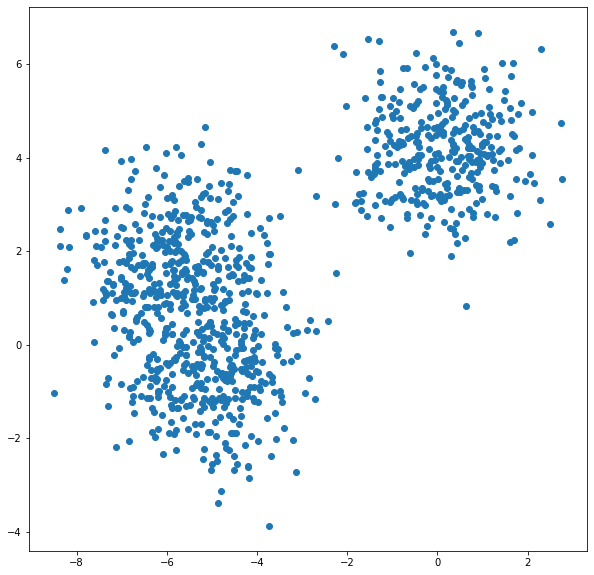

In [3]:
# Creates a scatter plot using the data stored in the array X
plt.figure(figsize=(10, 10))
# Sets the dimensions of the figure to be 10 (in) width and 10 (in) height (inches by default)
plt.scatter(X[:, 0], X[:, 1]);
# X[:, 0] and X[:, 1] are used to access the first and second columns (features) of the X array
# these columns are typically used as the X and Y coordinates for the scatter plot

# $K$-Means

El hiperparámetro es el numero de clústeres (`n_clusters`)

In [4]:
from sklearn.cluster import KMeans

n_clusters = 4

kmeans = KMeans(n_clusters = n_clusters)

y_pred = kmeans.fit_predict(X) 

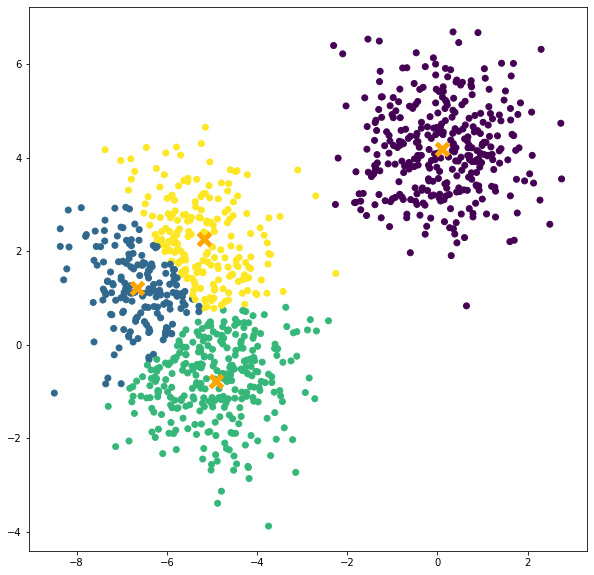

In [5]:
plt.figure(figsize=(10, 10))

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Marks the centers of the clusters
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c="orange");

Nota: K-means solo devuelve clústeres convexos

## Métricas no-supervisados de "clustering"

* [Calinski-Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index) - Más grande es mejor
* [Davies-Bouldin](https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index) - Lo ideal es 0
* [Silhouette](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) - Lo mejor es 1 y lo peor es -1

In [6]:
from sklearn import metrics
print("Calinski and Harabasz score:",metrics.calinski_harabasz_score(X, y_pred)) 
print("Davies-Bouldin score:       ",metrics.davies_bouldin_score(X, y_pred)) 
print("Silhouette Coefficient:     ",metrics.silhouette_score(X, y_pred))

Calinski and Harabasz score: 2330.5251425605516
Davies-Bouldin score:        0.838259564834058
Silhouette Coefficient:      0.4724653324781051


# Datos no-convexos: $K$-Means FAIL

In [7]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=n_samples, noise=0.05)

In [8]:
n_clusters = 2
y_pred = KMeans(n_clusters=n_clusters).fit_predict(X)

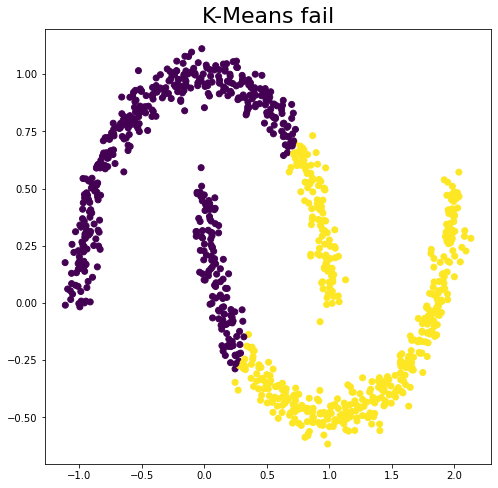

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-Means fail", fontsize=22);

# DBSCAN

Los hiperparámetros son el radio (`eps`) y el numero de vecinos (`min_samples`)

In [10]:
from sklearn.cluster import DBSCAN

eps = 0.1 # el radio

y_pred = DBSCAN(eps=eps, min_samples=5).fit_predict(X)

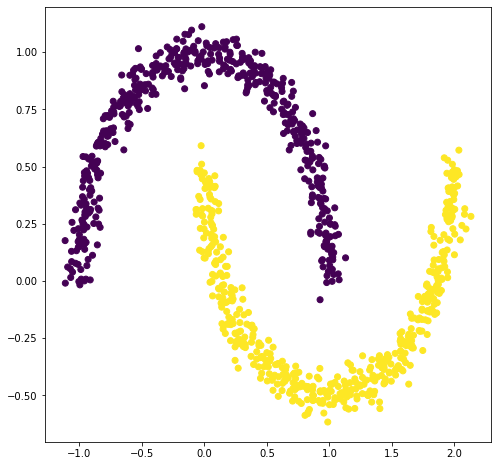

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred);

# Análisis: "[*UFO sightings in Spain (1538-2023)*](https://www.kaggle.com/datasets/carlmcbrideellis/ufo-sightings-in-spain-1538-2023)"

Vamos a usar $K$-Means para encontrar primero dos clústeres, y después cuatro clústeres, en los datos geoespaciales de **UFO sightings in Spain (1538-2023)**
y analizar cada clúster para ver similitudes y diferencias.

Leer los datos:

In [12]:
dataset = pd.read_csv("/kaggle/input/ufo-sightings-in-spain-1538-2023/UFO_sightings_Spain.csv")

dataset

,longitude,latitude,year,Cow incidents,Crop circle found,Alien sighted,Abduction event
0,-5.589385,42.482207,1915,Yes,No,No,No
1,-8.021037,43.018699,1599,Yes,No,No,No
2,-7.536301,42.233816,1923,Yes,No,No,No
3,-4.288818,42.106205,1576,Yes,No,No,No
4,-6.496170,42.212547,1786,Yes,No,No,No
...,...,...,...,...,...,...,...
275,-2.984226,38.129384,1853,No,Yes,Yes,Yes
276,-2.223036,38.337168,1645,No,Yes,Yes,Yes
277,-2.392218,37.995160,1937,No,No,Yes,No
278,-2.454239,38.063602,1956,No,No,Yes,Yes


visualizar los datos usando [Folium](https://python-visualization.github.io/folium/)

In [13]:
import folium

mapa = folium.Map(location=[40, -2], zoom_start=6, tiles="Stamen Terrain")

for i,row in dataset.iterrows():
    folium.Marker(location=[row['latitude'],row['longitude']],
    icon=folium.Icon(color="purple"),).add_to(mapa)
    
mapa

In [14]:
n_clusters = 2

kmeans = KMeans(n_clusters = n_clusters)

dataset["label"] = kmeans.fit_predict(dataset[["longitude","latitude"]]) 

dataset["label"]= dataset["label"].replace({0: "red", 1: "green", 2: "purple", 3: "orange"})

In [15]:
mapa = folium.Map(location=[40, -2], zoom_start=6, tiles="Stamen Terrain")

for i,row in dataset.iterrows():
    folium.Marker(location=[row['latitude'],row['longitude']],
    icon=folium.Icon(color=row["label"])).add_to(mapa) 
    
mapa

In [16]:
dataset

,longitude,latitude,year,Cow incidents,Crop circle found,Alien sighted,Abduction event,label
0,-5.589385,42.482207,1915,Yes,No,No,No,red
1,-8.021037,43.018699,1599,Yes,No,No,No,red
2,-7.536301,42.233816,1923,Yes,No,No,No,red
3,-4.288818,42.106205,1576,Yes,No,No,No,red
4,-6.496170,42.212547,1786,Yes,No,No,No,red
...,...,...,...,...,...,...,...,...
275,-2.984226,38.129384,1853,No,Yes,Yes,Yes,green
276,-2.223036,38.337168,1645,No,Yes,Yes,Yes,green
277,-2.392218,37.995160,1937,No,No,Yes,No,green
278,-2.454239,38.063602,1956,No,No,Yes,Yes,green


## Análisis de los clústeres
usando [`pandas.crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [17]:
pd.crosstab(dataset["label"], dataset["Cow incidents"])

Cow incidents,No,Yes
label,,
green,134,5
red,37,104


In [18]:
pd.crosstab(dataset["label"], dataset["Crop circle found"])

Crop circle found,No,Yes
label,,
green,133,6
red,73,68


In [19]:
pd.crosstab(dataset["label"], dataset["Alien sighted"])

Alien sighted,No,Yes
label,,
green,16,123
red,134,7


In [20]:
pd.crosstab(dataset["label"], dataset["Abduction event"])

Abduction event,No,Yes
label,,
green,83,56
red,129,12
